<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://biblioteca.uah.es/imgs/logo11.png", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">EN26 - HERRAMIENTAS DE ANÁLISIS · PEC2</p>
    <p style="margin: 0; text-align:right;">ENTORNOS DE ANÁLISIS DE DATOS (PYTHON)  </p>
<p style="margin: 0; text-align:right;">2018-2019 · Máster universitario en Ciencia de datos (Data science)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# Objetivo de la prueba
<br>
<div>
    <p>El ejercicio consiste en entregar un Notebook con los siguientes puntos:</p>
<ol>
<li>Utilizar el API REST de StackEchange (<a href="https://api.stackexchange.com/">api.stackexchange.com</a>) para obtener una muestra de más de 1000 preguntas sobre un tag concreto. Por ejemplo, el tag podría ser "python". Convertir esos datos en un DataFrame con al menos los siguientes elementos: identificador de usuario, identificador de pregunta, título, si se ha contestado o no, número de veces que se ha visto y fecha de creación. Sobre ese DataFrame , hacer lo siguiente:</li>
<ol>
<li>Buscar la pregunta más antigua no contestada.</li>
<li>Obtener y dibujar la distribución de las visitas.</li>
</ol>
<li>Sobre el DataFrame anterior, incluir columnas adicionales obteniendo información del API sobre la respuesta más valorada a cada pregunta, con al menos el identificador de la respuesta, la puntuación, la fecha en que se creó y el identificador del usuario que respondió.</li>
<li>Sobre el DataFrame anterior, extraer todos los usuarios diferentes que aparecen, y obtener el usuario de mayor y de menor reputación.</li>
</ol>
</div>

# Obtención del conjunto de datos del repositorio

<p>En primer lugar procedemos a realizar la conexión con <a href="https://api.stackexchange.com/">api.stackexchange.com</a>.
    Para ello vamos a utilizar la librería <b>'stackapi'</b>, cuyos datos de utilización y manual operativo se pueden ver en <a href="https://stackapi.readthedocs.io">stackapi.readthedocs.io</a>.</p>

## Instalación de la librería
<p>Como no sabemos si está o no instalada en el sistema de librerias de Python esta librería, en primer lugar procedemos a su instalación.</p>


In [1]:
!pip install stackapi

## Carga de la librería y del site

<p>A continuación realizamos la carga de la librería y del site sobre el que vamos a trabajar para resonder las cuestiones planteadas. En este caso el site es <b>'stackoverflow'</b>.</p>

In [4]:
from stackapi import StackAPI
from datetime import datetime

SITE = StackAPI('stackoverflow')

## Definición de los parámetros de búsqueda y carga de datos

<p>Seguidamente realizamos la definición de los parámetros de búsqueda que necesitamos y procedemos a la carga de datos contra el site.</p>
<p>Atendiendo a los requerimientos de la prueba, procederemos a definir los parámetros de configuración de límite maximo de carga de datos:</p>

<ul>
    <li><b>page_size:</b> tamaño máximo de pagina. Por defecto el tamaño de carga es de 100</li>
    <li><b>max_pages:</b> número de paginas maximo a cargar</li>
</ul>

<p>El multiplicador de ambos parámetros nos dará el tamaño máximo de carga. En nuestro caso sería de 2.000 objetos.</p>


In [5]:
SITE.page_size = 100
SITE.max_pages = 20

questions = SITE.fetch('questions', 
                       min=20, 
                       tagged='python', 
                       sort='votes',
                       fromdate = datetime(2015, 1, 1).isoformat(' '), 
                       todate = datetime(2017, 12, 31).isoformat(' '))
questions

{'backoff': 0,
 'has_more': True,
 'page': 20,
 'quota_max': 300,
 'quota_remaining': 300,
 'total': 0,
 'items': [{'tags': ['python',
    'performance',
    'python-3.x',
    'range',
    'python-internals'],
   'owner': {'reputation': 15662,
    'user_id': 2437514,
    'user_type': 'registered',
    'accept_rate': 69,
    'profile_image': 'https://i.stack.imgur.com/8QN0K.jpg?s=128&g=1',
    'display_name': 'Rick Teachey',
    'link': 'https://stackoverflow.com/users/2437514/rick-teachey'},
   'is_answered': True,
   'view_count': 134923,
   'protected_date': 1506854658,
   'accepted_answer_id': 30081318,
   'answer_count': 9,
   'score': 1573,
   'last_activity_date': 1550143213,
   'creation_date': 1430926363,
   'last_edit_date': 1519328585,
   'question_id': 30081275,
   'link': 'https://stackoverflow.com/questions/30081275/why-is-1000000000000000-in-range1000000000000001-so-fast-in-python-3',
   'title': 'Why is &quot;1000000000000000 in range(1000000000000001)&quot; so fast in P

## Análisis de los datos obtenidos
### Características generales

<p>En primer lugar vamos a verificar qué claves están disponibles en el objeto de tipo diccionario que hemos obtenido con nuestra consulta.</p>

In [6]:
print(questions.keys())
type(questions['items'])

dict_keys(['backoff', 'has_more', 'page', 'quota_max', 'quota_remaining', 'total', 'items'])


list

### Extracción de items y verificación de información

<p>Dado que hemos verificado que nuestro diccionario contenia 7 claves, y una de ellas (<b>items</b>) es la que previsiblemente contiene los datos que vamos a necesitar, procedemos a extraer los datos de <b>items</b> en un formato <i>lista</i>.</p>
<p>Esta lista contiene a su vez el conjunto completo de 2000 diccionarios. Vamos a analizar uno para ver como podemos extraer la información que necesitamos.</p>

In [7]:
qlist = questions['items']  
qlist[0]

{'tags': ['python', 'performance', 'python-3.x', 'range', 'python-internals'],
 'owner': {'reputation': 15662,
  'user_id': 2437514,
  'user_type': 'registered',
  'accept_rate': 69,
  'profile_image': 'https://i.stack.imgur.com/8QN0K.jpg?s=128&g=1',
  'display_name': 'Rick Teachey',
  'link': 'https://stackoverflow.com/users/2437514/rick-teachey'},
 'is_answered': True,
 'view_count': 134923,
 'protected_date': 1506854658,
 'accepted_answer_id': 30081318,
 'answer_count': 9,
 'score': 1573,
 'last_activity_date': 1550143213,
 'creation_date': 1430926363,
 'last_edit_date': 1519328585,
 'question_id': 30081275,
 'link': 'https://stackoverflow.com/questions/30081275/why-is-1000000000000000-in-range1000000000000001-so-fast-in-python-3',
 'title': 'Why is &quot;1000000000000000 in range(1000000000000001)&quot; so fast in Python 3?'}

<p>Como se puede verificar, cada uno de los elementos de la variable <b>qlist</b> es a su vez un diccionario. A continuación, vamos a ver algunos de los elementos de este diccionario que nos pueden ser útilies ala hora de conformar nuestro dataframe.<p>

In [8]:
print('IDuser = ', qlist[0]['owner']['user_id'])
print('IDquestion = ', qlist[0]['question_id'])
print('Titulo de la pregunta = ', qlist[0]['title'])
print('Respondida = ', qlist[0]['is_answered'])
print('Contador vistas = ', qlist[0]['view_count'])
print('Fecha Creación = ', qlist[0]['creation_date'])
print('Reputacion = ', qlist[0]['owner']['reputation'])
print('Tipo de usuario = ', qlist[0]['owner']['user_type'])
print('Contador de respuestas = ', qlist[0]['answer_count'])

IDuser =  2437514
IDquestion =  30081275
Titulo de la pregunta =  Why is &quot;1000000000000000 in range(1000000000000001)&quot; so fast in Python 3?
Respondida =  True
Contador vistas =  134923
Fecha Creación =  1430926363
Reputacion =  15662
Tipo de usuario =  registered
Contador de respuestas =  9


### Extracción de datos y creación del dataframe

<p>Con la información extraida anteriormente, podemos ver qu elo mas práctico es crear un bucle que recorra el listado y extraiga los datos que vayamos aincorporar al dataframe.</p>
<p>Es importante saber que dentro de cada elemento de tipo <i>dict</i> del listado puede haber o no las claves que necesitemos. Por ello utilizaremos la función <b>get()</b> que devuelve <i>none</i> en el caso de que no este la clave entre los datos recuperados. Este valor <i>none</i> se incorporará al dataframe como indicador de dato faltante: <i>NA</i><p>
<p>Por último, aunque solo se requieren por definición de la práctica 6 variables, para nuestro propósito vamos a recoger datos de 9 variables:</p>
<ul>
<li><b>Identificador de usuario (IDUser):</b> Se extrae de ['owner']['user_id']</li>
<li><b>Identificador de pregunta (IDQuestion):</b> Se extrae de ['question_id']</li>
<li><b>Titulo de la pregunta (Title):</b> Se extrae de ['title']</li>
<li><b>Identificador de pregunta respondida (IsAnswered):</b> Se extrae de ['is_answered']</li>
<li><b>Contador vistas (ViewCount):</b> Se extrae de ['view_count']</li>
<li><b>Fecha Creación (CreationDate):</b> Se extrae de ['creation_date']</li>
<li><b>Valor de Reputacion (Reputation):</b> Se extrae de ['reputation']</li>
<li><b>Tipo de usuario (UserType):</b> Se extrae de ['owner']['user_type']</li>
<li><b>Contador de respuestas (AnswerCount):</b> Se extrae de ['answer_count']  </li>  
</ul>

In [9]:
import pandas as pd
df = pd.DataFrame(qlist)
df.head()

,accepted_answer_id,answer_count,closed_date,closed_reason,creation_date,is_answered,last_activity_date,last_edit_date,link,migrated_from,owner,protected_date,question_id,score,tags,title,view_count
0,30081318.0,9,NaN,NaN,1430926363,True,1550143213,1.519329e+09,https://stackoverflow.com/questions/30081275/w...,NaN,"{'reputation': 15662, 'user_id': 2437514, 'use...",1.506855e+09,30081275,1573,"[python, performance, python-3.x, range, pytho...",Why is &quot;1000000000000000 in range(1000000...,134923
1,27909082.0,15,NaN,NaN,1420966114,True,1545913125,1.495540e+09,https://stackoverflow.com/questions/27885397/h...,NaN,"{'reputation': 5604, 'user_id': 1054939, 'user...",1.426867e+09,27885397,693,"[python, windows, pip, python-wheel, jpype]",How do I install a Python package with a .whl ...,1047578
2,30216156.0,5,NaN,NaN,1431522982,True,1529191525,1.495540e+09,https://stackoverflow.com/questions/30216000/w...,NaN,"{'reputation': 3422, 'user_id': 3408500, 'user...",1.432132e+09,30216000,627,"[python, performance, list, instantiation, lit...",Why is [] faster than list()?,68027
3,41573588.0,3,NaN,NaN,1484065663,True,1547057712,1.485269e+09,https://stackoverflow.com/questions/41573587/w...,NaN,"{'reputation': 53003, 'user_id': 247696, 'user...",NaN,41573587,521,"[python, virtualenv, virtualenvwrapper, pyenv,...","What is the difference between venv, pyvenv, p...",99877
4,31421411.0,8,NaN,NaN,1436933578,True,1480603389,1.448747e+09,https://stackoverflow.com/questions/31421379/w...,NaN,"{'reputation': 2542, 'user_id': 4232487, 'user...",1.437027e+09,31421379,466,"[python, python-2.7, python-3.x]","Why does &quot;not(True) in [False, True]&quot...",28770


<p>Como podemos ver en la tabla previa, hay algunas variables que podemos tomar directamente para nuestro dataframe y otras que no es posible, ya que la variable <b>owner</b> es un diccionario en sí misma.</p>
<p>En primer lugar vamos a crear un segundo dataframe a partir de la variable <b>owner</b>:</p>

In [10]:
owner = pd.DataFrame(df['owner'].values.tolist())
owner.head()

,accept_rate,display_name,link,profile_image,reputation,user_id,user_type
0,69.0,Rick Teachey,https://stackoverflow.com/users/2437514/rick-t...,https://i.stack.imgur.com/8QN0K.jpg?s=128&g=1,15662.0,2437514.0,registered
1,100.0,e9t,https://stackoverflow.com/users/1054939/e9t,https://i.stack.imgur.com/uqNUS.jpg?s=128&g=1,5604.0,1054939.0,registered
2,100.0,Augusta,https://stackoverflow.com/users/3408500/augusta,https://i.stack.imgur.com/LuVrb.png?s=128&g=1,3422.0,3408500.0,registered
3,78.0,Flimm,https://stackoverflow.com/users/247696/flimm,https://www.gravatar.com/avatar/936383b387d6cc...,53003.0,247696.0,registered
4,NaN,Texom512,https://stackoverflow.com/users/4232487/texom512,https://i.stack.imgur.com/3M9AP.png?s=128&g=1,2542.0,4232487.0,registered


In [11]:
owner.columns.values

array(['accept_rate', 'display_name', 'link', 'profile_image',
       'reputation', 'user_id', 'user_type'], dtype=object)

In [12]:
owner = owner.drop(['accept_rate', 'display_name', 'link', 'profile_image'], axis=1)
owner.head()

,reputation,user_id,user_type
0,15662.0,2437514.0,registered
1,5604.0,1054939.0,registered
2,3422.0,3408500.0,registered
3,53003.0,247696.0,registered
4,2542.0,4232487.0,registered


<p>A continuación vamos a realizar el mismo proceso pero con el dataframe principal <b>df</b></p>

In [13]:
df.columns.values

array(['accepted_answer_id', 'answer_count', 'closed_date',
       'closed_reason', 'creation_date', 'is_answered',
       'last_activity_date', 'last_edit_date', 'link', 'migrated_from',
       'owner', 'protected_date', 'question_id', 'score', 'tags', 'title',
       'view_count'], dtype=object)

In [14]:
df = df.drop(['accepted_answer_id', 'closed_date', 'closed_reason',  
       'last_activity_date', 'last_edit_date', 'link', 'migrated_from', 
         'owner', 'protected_date', 'score', 'tags'], axis=1)
df.head()

,answer_count,creation_date,is_answered,question_id,title,view_count
0,9,1430926363,True,30081275,Why is &quot;1000000000000000 in range(1000000...,134923
1,15,1420966114,True,27885397,How do I install a Python package with a .whl ...,1047578
2,5,1431522982,True,30216000,Why is [] faster than list()?,68027
3,3,1484065663,True,41573587,"What is the difference between venv, pyvenv, p...",99877
4,8,1436933578,True,31421379,"Why does &quot;not(True) in [False, True]&quot...",28770


<p>Finalmente, vamos a proceder a concatener ambos dataframes segun el indice del dataframe <b>df</b>, ya que la correspondencia es completa entre ambos dataframes en su indice respectivo.</p>

In [15]:
dfPython = pd.concat([df, owner], axis=1, join_axes=[df.index])
dfPython.head()

,answer_count,creation_date,is_answered,question_id,title,view_count,reputation,user_id,user_type
0,9,1430926363,True,30081275,Why is &quot;1000000000000000 in range(1000000...,134923,15662.0,2437514.0,registered
1,15,1420966114,True,27885397,How do I install a Python package with a .whl ...,1047578,5604.0,1054939.0,registered
2,5,1431522982,True,30216000,Why is [] faster than list()?,68027,3422.0,3408500.0,registered
3,3,1484065663,True,41573587,"What is the difference between venv, pyvenv, p...",99877,53003.0,247696.0,registered
4,8,1436933578,True,31421379,"Why does &quot;not(True) in [False, True]&quot...",28770,2542.0,4232487.0,registered


In [16]:
dfPython.columns.values

array(['answer_count', 'creation_date', 'is_answered', 'question_id',
       'title', 'view_count', 'reputation', 'user_id', 'user_type'],
      dtype=object)

In [17]:
sequence = ['user_id', 'question_id', 'title', 'is_answered',
            'view_count', 'creation_date', 'reputation',
            'user_type', 'answer_count']

dfPython = dfPython.reindex(columns=sequence)
dfPython.head()

,user_id,question_id,title,is_answered,view_count,creation_date,reputation,user_type,answer_count
0,2437514.0,30081275,Why is &quot;1000000000000000 in range(1000000...,True,134923,1430926363,15662.0,registered,9
1,1054939.0,27885397,How do I install a Python package with a .whl ...,True,1047578,1420966114,5604.0,registered,15
2,3408500.0,30216000,Why is [] faster than list()?,True,68027,1431522982,3422.0,registered,5
3,247696.0,41573587,"What is the difference between venv, pyvenv, p...",True,99877,1484065663,53003.0,registered,3
4,4232487.0,31421379,"Why does &quot;not(True) in [False, True]&quot...",True,28770,1436933578,2542.0,registered,8


In [18]:
sequence = {'user_id': 'IDUser', 
            'question_id': 'IDQuestion', 
            'title': 'Title', 
            'is_answered': 'IsAnswered',
            'view_count': 'ViewCount', 
            'creation_date': 'CreationDate', 
            'reputation': 'Reputation',
            'user_type': 'UserType', 
            'answer_count': 'AnswerCount'}

dfPython = dfPython.rename(columns = sequence) 
dfPython.head()

,IDUser,IDQuestion,Title,IsAnswered,ViewCount,CreationDate,Reputation,UserType,AnswerCount
0,2437514.0,30081275,Why is &quot;1000000000000000 in range(1000000...,True,134923,1430926363,15662.0,registered,9
1,1054939.0,27885397,How do I install a Python package with a .whl ...,True,1047578,1420966114,5604.0,registered,15
2,3408500.0,30216000,Why is [] faster than list()?,True,68027,1431522982,3422.0,registered,5
3,247696.0,41573587,"What is the difference between venv, pyvenv, p...",True,99877,1484065663,53003.0,registered,3
4,4232487.0,31421379,"Why does &quot;not(True) in [False, True]&quot...",True,28770,1436933578,2542.0,registered,8


<p>Ahora ya tenemso el dataframe dfPython con als variables que hemos considerado al comienzo, en el orden que indicabamos y les hemos ajustado el nombre.</p>

## Buscar la pregunta más antigua no contestada
<p>Ahora vamos a tratar de encontrar en el dataframe la pregunta mas antigua no contestada.</p>

In [24]:
not_answered = dfPython[dfPython['IsAnswered'].astype(str).str.contains('False')]
not_answered.head()

,IDUser,IDQuestion,Title,IsAnswered,ViewCount,CreationDate,Reputation,UserType,AnswerCount
411,668624.0,37078880,Status of parallelization of pandas.apply(),False,8949,1462558311,2946.0,registered,0


In [28]:
not_answered[not_answered["CreationDate"] == min(not_answered["CreationDate"])]

,IDUser,IDQuestion,Title,IsAnswered,ViewCount,CreationDate,Reputation,UserType,AnswerCount
411,668624.0,37078880,Status of parallelization of pandas.apply(),False,8949,1462558311,2946.0,registered,0


In [42]:
datetime.fromtimestamp(min(not_answered["CreationDate"])).strftime("%d %B, %Y %I:%M:%S")

'06 May, 2016 08:11:51'

<p>En el listado anterior se puede verificar la fecha mas antigua entre las que son preguntas no contestadas.</p>
<p>como la fecha esta en formato <b>int</b> lo que hacemos primero es buscar el valor mas bajo y luego presentarlo.</p>

## Obtener y dibujar la distribución de las visitas

<p>Para poder realizar la distribución de las visitas tenemos que trabajar con la variable <b>Contador vistas (ViewCount)</b>, que es la encargada de indicarnos cuantas visitas ha tenido esta pregunta a lo largo del tiempo.</p>
<p>La visualización la realizaremos con un histograma sobre dicha variable, el cual lo realizaremos con las funciones de la librería <b><i>matplotlib.pyplot</i></b> y tambien con las de <b><i>seaborn</i></b>.</p>

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

Text(0,0.5,'Número de preguntas')

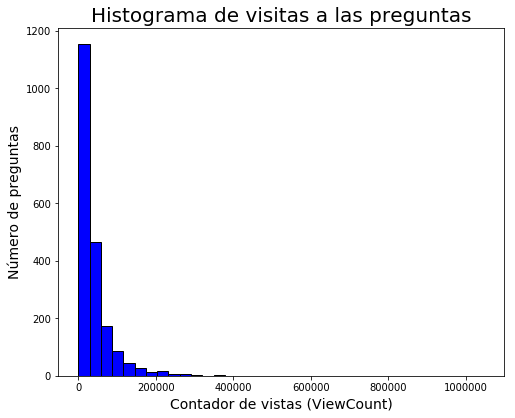

In [45]:
# Definimos el tamaño de la imagen
width=8 # inch
aspect=0.8 # height/width ratio
height = width*aspect
plt.figure(figsize=(width, height ))

# Presentamos el histograma
plt.hist(dfPython['ViewCount'], color = 'blue', edgecolor = 'black',bins = int(180/5))

# añadimos etiquetas
plt.title('Histograma de visitas a las preguntas', size = 20)
plt.xlabel('Contador de vistas (ViewCount)', size = 14)
plt.ylabel('Número de preguntas', size = 14)

<p>A continuación haemos la misma presentación con la librería  <b><i>seaborn</i></b>, en la que además presentamos la curva de densidad de la distribución.</p>

Text(0,0.5,'Número de preguntas')

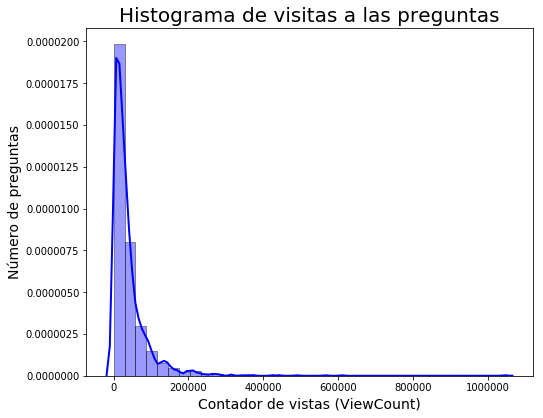

In [48]:
# Definimos el tamaño de la imagen
width=8 # inch
aspect=0.8 # height/width ratio
height = width*aspect
plt.figure(figsize=(width, height ))

# Presentamos el histograma con la libreria Seaborn 
sns.distplot(dfPython['ViewCount'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# añadimos etiquetas
plt.title('Histograma de visitas a las preguntas', size = 20)
plt.xlabel('Contador de vistas (ViewCount)', size = 14)
plt.ylabel('Número de preguntas', size = 14)

<p>Con ambas presentaciones podemos verificar que la distribución tiene una clara asimetría <b>positiva</b>.</p>
<p>Los datos generales y el coeficiente de simetria, a continuacion, nos lo corroboran. Además finalmente presentamos un <b>diagrama de box-plot</b> que lo confirma.<p>

In [57]:
dfPython['ViewCount'].describe()
stats.skew(dfPython['ViewCount'])

6.088235463488334

{'whiskers': [<matplotlib.lines.Line2D at 0xdf4ac88>,
 'caps': [<matplotlib.lines.Line2D at 0xdf52518>,
 'boxes': [<matplotlib.lines.Line2D at 0xdf4a748>],
 'medians': [<matplotlib.lines.Line2D at 0xdf52d68>],
 'fliers': [<matplotlib.lines.Line2D at 0xdf52e48>],
 'means': []}

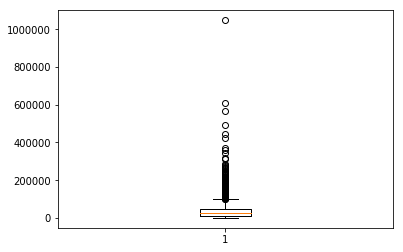

In [53]:
plt.boxplot(dfPython['ViewCount'])

# Incluir columnas adicionales obteniendo información del API sobre la respuesta más valorada a cada pregunta

<p>Se va a realizar una consulta mediante un bucle <b><i>for</i></b> preguntandole al API con una lista de los ID de las preguntas del dataframe. Con esto se obtiene un nuevo dataframe sobre el que se puede realizar una simplificación y busqueda.</p>
<p>Los datos que se pretenden tomar para cada pregunta son:</p>

<ul>
<li><b>Identificador de la respuesta más valorada (IDAnswer):</b> Se extrae de ['answer_id']</li>
<li><b>Puntuación (ScoreAnswer):</b> Se extrae de ['score']</li>
<li><b>Fecha en la que se creó (DateAnswer):</b> Se extrae de ['creation_date']</li>
<li><b>Identificador del usuario (IDUserAnswer):</b> Se extrae de ['owner']['user_id']</li>
<li><b>Nombre del usuario (DisplayName):</b> Se extrae de ['owner']['display_name']</li>    
<li><b>Reputacion (ReputationIDUserAnswer):</b> Se extrae de ['owner']['reputation']</li> 
</ul>

In [58]:
answers_0 = SITE.fetch('/questions/{ids}/answers', 
                       min=20, 
                       ids = dfPython['IDQuestion'][0:100].tolist()
                       )

qlist_0 = answers_0['items']
df_0 = pd.DataFrame(qlist_0)

for i in range(101, len(dfPython), 100):
    end = i+99
    answers_next = SITE.fetch('/questions/{ids}/answers', 
                              min=20, 
                              ids = dfPython['IDQuestion'][i:end].tolist()
                              )
    qlist_next = answers_next['items']
    df_next = pd.DataFrame(qlist_next)
    
    frames=[df_0, df_next]
    df_0 = pd.concat(frames)

df_0.head()

StackAPIError: ('https://api.stackexchange.com/2.2//questions/33602014;33182092;43658870;41094013;36288235;28036812;35013726;41125909;34049618;33432426;32167418;42098126;28240706;29794959;35164529;34945554;29751572;39924826;36288670;31432843;33788989;28437071;29281935;35745050;33239308;42190783;32688688;41517798;29661764;30088006;35246386;28104393;29313667;40528048;38154040;39903242;34531416;38189660;34578168;29403401;38579725;34147515;33383840;28117576;36612512;34134879;39921607;33203645;35833011;32659552;33404394;43831539;33175827;29688168;41499857;35572663;39843584;36468111;35533803;28669482;30926670;33271098;35523635;31681373;36950416;29558007;29717257;42818361;45346575;36688966;36538780;27745842;43102442;44164749;30631325;35245401;33655731;27896214;33356442;45871269;43029672;35139108;38134086;33778664;30854967;41276067;35760943;34398632;32501995;30259452;42049147;35673474;34835951;42761707;31099561;43396572;34671217;38174155;37730243/answers/?pagesize=100&page=2&filter=default&min=20&site=stackoverflow', 502, 'throttle_violation', 'too many requests from this IP, more requests available in 84629 seconds')

In [ ]:
owner_0 = pd.DataFrame(df_0['owner'].values.tolist())
owner_0.head()

In [ ]:
owner_0.columns.values

In [ ]:
owner_0 = owner_0.drop(['accept_rate', 'link', 'profile_image', 'user_type'], axis=1)
owner_0.head()

In [ ]:
df_0.columns.values

In [ ]:
df_0 = df_0.drop(['community_owned_date', 'is_accepted', 
                  'last_activity_date', 'last_edit_date', 'owner'], axis=1)
df_0.head()

In [ ]:
dfAnswers = pd.concat([df_0, owner_0], axis=1, join_axes=[df_0.index])
dfAnswers.head()

In [ ]:
dfAnswers.columns.values

In [ ]:
sequence_0 = {'answer_id': 'IDAnswer', 
              'creation_date': 'DateAnswer', 
              'question_id': 'question_id', 
              'score': 'ScoreAnswer',
              'display_name': 'DisplayName', 
              'reputation': 'ReputationIDUserAnswer', 
              'user_id': 'IDUserAnswer'}

dfAnswers = dfAnswers.rename(columns = sequence_0)

# Extraer todos los usuarios diferentes que aparecen, y obtener el usuario de mayor y de menor reputación